# **Space X  Falcon 9 First Stage Landing Prediction**


##  Machine Learning Prediction


## Objectives



*   create a column for the class
*   Standardize the data
*   Split into training data and test data
    \-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
*   Find the method performs best using test data


***


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [4]:
data = pd.read_csv('E://DATA/SpaceX_dataset/dataset_part_2.csv')

In [5]:
X = pd.read_csv('E://DATA/SpaceX_dataset/dataset_part_3.csv')

In [6]:
Y = data['Class'].to_numpy()

In [7]:
# Standardize the data
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape)
print ('Test set:', X_test.shape)

Train set: (72, 83)
Test set: (18, 83)


In [9]:
Y_test.shape

(18,)

Create a logistic regression object using then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [10]:
#cv = 10
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [11]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv = logreg_cv.fit(X_train, Y_train)

In [12]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [13]:
logreg_cv = logreg_cv.best_estimator_

Calculate the accuracy on the test data :


In [14]:
logreg_S = logreg_cv.score(X_test, Y_test)
logreg_S

0.8333333333333334

### confusion matrix:


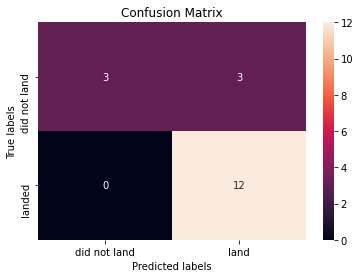

In [15]:
yhat_lr=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)

In [16]:
#cv = 10
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [17]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv = svm_cv.fit(X_train, Y_train)

In [18]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Calculate the accuracy on the test data :


In [19]:
svm_S = svm_cv.score(X_test, Y_test)
svm_S

0.8333333333333334

### confusion matrix


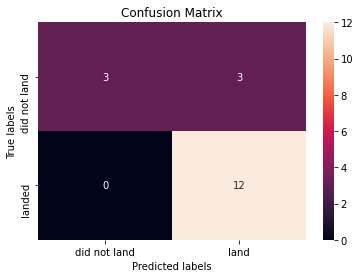

In [20]:
yhat_sv = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_sv)

In [21]:
#cv = 10
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [28]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv = tree_cv.fit(X_train, Y_train)

In [29]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.875


Calculate the accuracy of tree_cv on the test data :


In [30]:
tree_S = tree_cv.score(X_test, Y_test)
tree_S

0.8888888888888888

### confusion matrix

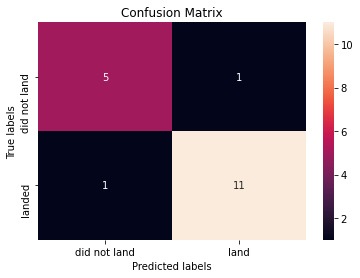

In [31]:
yhat_tr = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tr)

In [32]:
#cv = 10
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [33]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv = knn_cv.fit(X_train, Y_train)

In [34]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Calculate the accuracy of tree_cv on the test data :


In [36]:
knn_S = knn_cv.score(X_test, Y_test)
knn_S

0.8333333333333334

### confusion matrix


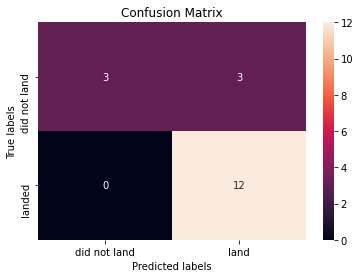

In [37]:
yhat_k = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_k)

Find the method performs best:


### calculate the weighted F1 scores for each Classifiers :

In [38]:
from sklearn.metrics import f1_score
print('f1_score for LR :', f1_score(Y_test, yhat_lr, average='weighted'))
print('f1_score for SVM :', f1_score(Y_test, yhat_sv, average='weighted'))
print('f1_score for DTree :',f1_score(Y_test, yhat_tr, average='weighted'))
print('f1_score for KNN :', f1_score(Y_test, yhat_k, average='weighted'))

f1_score for LR : 0.8148148148148149
f1_score for SVM : 0.8148148148148149
f1_score for DTree : 0.8888888888888888
f1_score for KNN : 0.8148148148148149


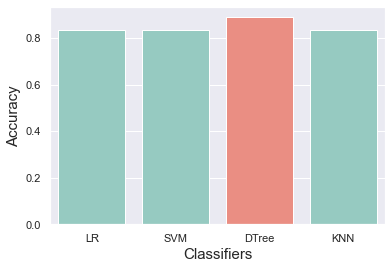

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

x = ['LR', 'SVM', 'DTree', 'KNN']
y = [logreg_S, svm_S, tree_S, knn_S]


def colors_from_values(values, palette_name):
    
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

ax= sns.barplot(x=x, y=y, palette=colors_from_values(y,"Set3"))
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()

#### Select Decision Tree for the final model, because false positives in the confusion matrix for this model is less than other models and F1 scores is greater than others.

| Algorithm          |  F1-score |
|--------------------|-----------|
|LogisticRegression  | 0.814     |
|SVM                 |  0.814    |
|__Decision Tree__    | __0.888__ |
| KNN                | 0.814     |


__Version author : Sina Baghdadi__

Copyright © 2020 IBM Corporation. All rights reserved.